# Read dataset

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Faiqazmi/Dataset_latihan/main/IMDB_small_size.csv', delimiter=',')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.shape

(10000, 2)

In [4]:
df.sentiment.value_counts()

positive    5028
negative    4972
Name: sentiment, dtype: int64

## resize dataset

In [5]:
df_resize = df.iloc[:1000]
df_resize.shape

(1000, 2)

In [6]:
df_resize.sentiment.value_counts()

positive    501
negative    499
Name: sentiment, dtype: int64

## Tokenizing, Removing stopword, and Lemmatization

In [7]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


df_text = df_resize['review'].astype(str)
df_class = df_resize['sentiment']
lines = df_text.values.tolist()
list_tokens_lemma = list()
lemmatizer = WordNetLemmatizer()

for line in lines:
  line = line.replace("<br />","")
  tokens = word_tokenize(line)
  tokens = [w.lower() for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  tokens = [word for word in tokens if not word in stopwords.words()]
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  list_tokens_lemma.append(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [8]:
list_tokens_lemma[10]

['phil',
 'alien',
 'quirky',
 'film',
 'humour',
 'based',
 'around',
 'oddness',
 'everything',
 'rather',
 'actual',
 'first',
 'odd',
 'pretty',
 'funny',
 'movie',
 'progressed',
 'find',
 'joke',
 'oddness',
 'funny',
 'low',
 'budget',
 'film',
 'thats',
 'never',
 'problem',
 'pretty',
 'interesting',
 'character',
 'eventually',
 'lost',
 'imagine',
 'film',
 'would',
 'appeal',
 'stoner',
 'currently',
 'something',
 'similar',
 'better',
 'try',
 'brother',
 'another',
 'planet']

# Feature Extraction

## TF-IDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
new_doc = list()


for doc in list_tokens_lemma:
  row = ' '.join(doc)
  new_doc.append(row)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_input_tfidf = tfidf_vectorizer.fit_transform(new_doc)

In [10]:
print(tfidf_vectorizer.get_feature_names())
print(X_input_tfidf.toarray())
print(tfidf_vectorizer.vocabulary_)
print(X_input_tfidf.shape)

['ability', 'able', 'absolutely', 'accent', 'across', 'act', 'acted', 'acting', 'action', 'actor', 'actress', 'actual', 'actually', 'add', 'admit', 'adult', 'adventure', 'age', 'ago', 'agree', 'air', 'alien', 'alive', 'almost', 'alone', 'along', 'already', 'although', 'always', 'amazing', 'america', 'american', 'among', 'animal', 'animated', 'animation', 'anne', 'annoying', 'another', 'answer', 'anyone', 'anything', 'anyway', 'apart', 'apparently', 'appeal', 'appear', 'appearance', 'appears', 'army', 'around', 'art', 'aside', 'aspect', 'atmosphere', 'attempt', 'attention', 'audience', 'average', 'avoid', 'away', 'awesome', 'awful', 'baby', 'back', 'background', 'bad', 'badly', 'band', 'based', 'basic', 'basically', 'batman', 'battle', 'beautiful', 'became', 'become', 'becomes', 'begin', 'beginning', 'behind', 'belief', 'believable', 'believe', 'best', 'better', 'beyond', 'big', 'bill', 'bit', 'bizarre', 'black', 'blood', 'blue', 'body', 'bond', 'book', 'bored', 'boring', 'box', 'boy', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Classification models

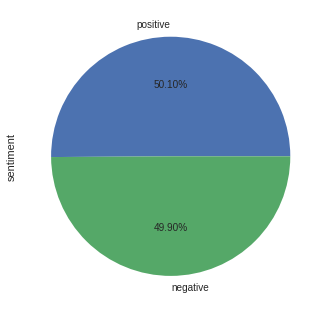

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

data = df_resize['sentiment'].value_counts()
data.plot(kind='pie',autopct='%.2f%%')
plt.show() 

## MLP + TFIDF

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier


# get X and y
df_X = X_input_tfidf
df_y = df_resize['sentiment']

#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

#label encoding for y
le = LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.fit_transform(y_test)

#mulai learning 
#model=MLPClassifier(max_iter=1000)
model=MLPClassifier(max_iter=1000, random_state=42, activation='relu')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Accuracy  0.8
Precision  0.7548387096774194
Recall  0.841726618705036
Confusion matrix  [[123  38]
 [ 22 117]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


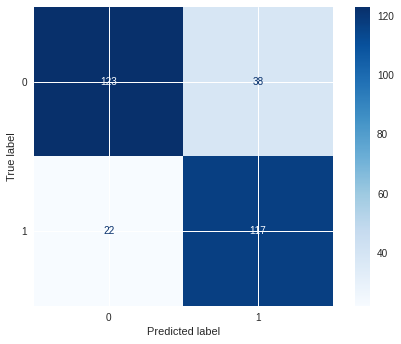

In [13]:
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred))  
print('Recall ',recall_score(y_test, y_pred)) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# Word Cloud



In [14]:
from wordcloud import WordCloud

text = ' '.join(new_doc)
wordcloud = WordCloud(width = 800, height = 800, background_color="white")
wordcloud = wordcloud.generate_from_text(text)

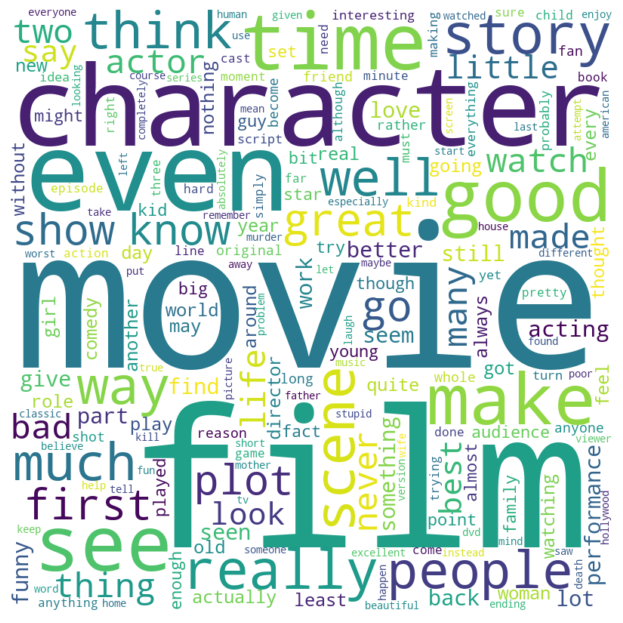

In [15]:
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()